In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from xgboost import plot_importance

import matplotlib.pyplot as plt
import  seaborn as sns

import os

In [3]:

filepath=os.path.abspath('D:\DataSets\Build-DataSet\S50F15M_LS\Label&Feature 3Q20To1Q21\Long_Label_3q20-1q21\MLTrain-Long_S50M15_3Q20To1Q21.csv')

dataset =pd.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)
dataset.drop(columns=['open','high','low','close'],inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4005 entries, 2020-07-01 09:45:00 to 2021-03-31 16:45:00
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indy_ma-550             4005 non-null   float64
 1   indy_ma-1100            4005 non-null   float64
 2   indy_hh-550             4005 non-null   float64
 3   indy_ll-550             4005 non-null   float64
 4   indy_mid-550            4005 non-null   float64
 5   indy_hh2-1100           4005 non-null   float64
 6   indy_ll2-1100           4005 non-null   float64
 7   indy_mid2-1100          4005 non-null   float64
 8   indy_macd110-440        4005 non-null   float64
 9   indy_signal110-440-110  4005 non-null   float64
 10  indy_hist_macd110-440   4005 non-null   float64
 11  indy_rsi25-ma20         4005 non-null   float64
 12  indy_6ATRTrail_DC-110   4005 non-null   float64
 13  cate_3trend-550_ma110   4005 non-null   int64  
 14  cate

In [4]:
dataset.tail()

,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend,LongSignal
datetime,,,,,,,,,,,,,,,,,,
2021-03-31 15:45:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.39,1.18,1.20,47.74,1.0,3,0,3,4,0
2021-03-31 16:00:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.45,1.16,1.29,47.00,1.0,3,0,3,4,0
2021-03-31 16:15:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.53,1.14,1.39,46.28,1.0,3,0,3,4,0
2021-03-31 16:30:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.58,1.12,1.46,46.08,1.0,3,0,3,4,0
2021-03-31 16:45:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.61,1.11,1.51,45.92,1.0,3,0,3,4,0


In [5]:
labelName="LongSignal"
select_feat=[
            'cate_CombineTrend' \
             ,'indy_rsi25-ma20','indy_macd110-440','indy_signal110-440-110','indy_hist_macd110-440'\
             ,'indy_ll-550','indy_mid-550','indy_hh-550']
dfx=dataset[select_feat]
dfx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4005 entries, 2020-07-01 09:45:00 to 2021-03-31 16:45:00
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cate_CombineTrend       4005 non-null   int64  
 1   indy_rsi25-ma20         4005 non-null   float64
 2   indy_macd110-440        4005 non-null   float64
 3   indy_signal110-440-110  4005 non-null   float64
 4   indy_hist_macd110-440   4005 non-null   float64
 5   indy_ll-550             4005 non-null   float64
 6   indy_mid-550            4005 non-null   float64
 7   indy_hh-550             4005 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 281.6 KB


In [6]:
dfx.tail()

,cate_CombineTrend,indy_rsi25-ma20,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_ll-550,indy_mid-550,indy_hh-550
datetime,,,,,,,,
2021-03-31 15:45:00,4,47.74,2.39,1.18,1.20,0.95,0.001,1.02
2021-03-31 16:00:00,4,47.00,2.45,1.16,1.29,0.95,0.001,1.02
2021-03-31 16:15:00,4,46.28,2.53,1.14,1.39,0.95,0.001,1.02
2021-03-31 16:30:00,4,46.08,2.58,1.12,1.46,0.95,0.001,1.02
2021-03-31 16:45:00,4,45.92,2.61,1.11,1.51,0.95,0.001,1.02


In [25]:
dfx.describe()

,cate_CombineTrend,indy_rsi25-ma20,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_ll-550,indy_mid-550,indy_hh-550
count,69679.000000,69679.000000,69679.000000,69679.000000,69679.000000,69679.000000,69679.000000,69679.000000
mean,3.192971,50.968079,0.554113,0.580211,-0.026089,783.475576,821.402154,859.328729
std,0.817913,9.472745,19.957279,19.252382,8.198114,240.296742,238.585017,238.479251
min,1.000000,19.990000,-158.760000,-145.770000,-45.820000,254.000000,289.800000,305.400000
25%,3.000000,44.370000,-9.580000,-9.415000,-4.870000,572.000000,607.050000,648.700000
50%,3.000000,51.070000,2.860000,3.040000,-0.160000,848.100000,883.950000,929.200000
75%,4.000000,57.720000,13.730000,13.300000,4.750000,984.600000,1012.750000,1053.600000
max,4.000000,81.910000,68.230000,61.760000,42.170000,1162.700000,1192.300000,1221.900000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D55BD6E08>,
      dtype=object)

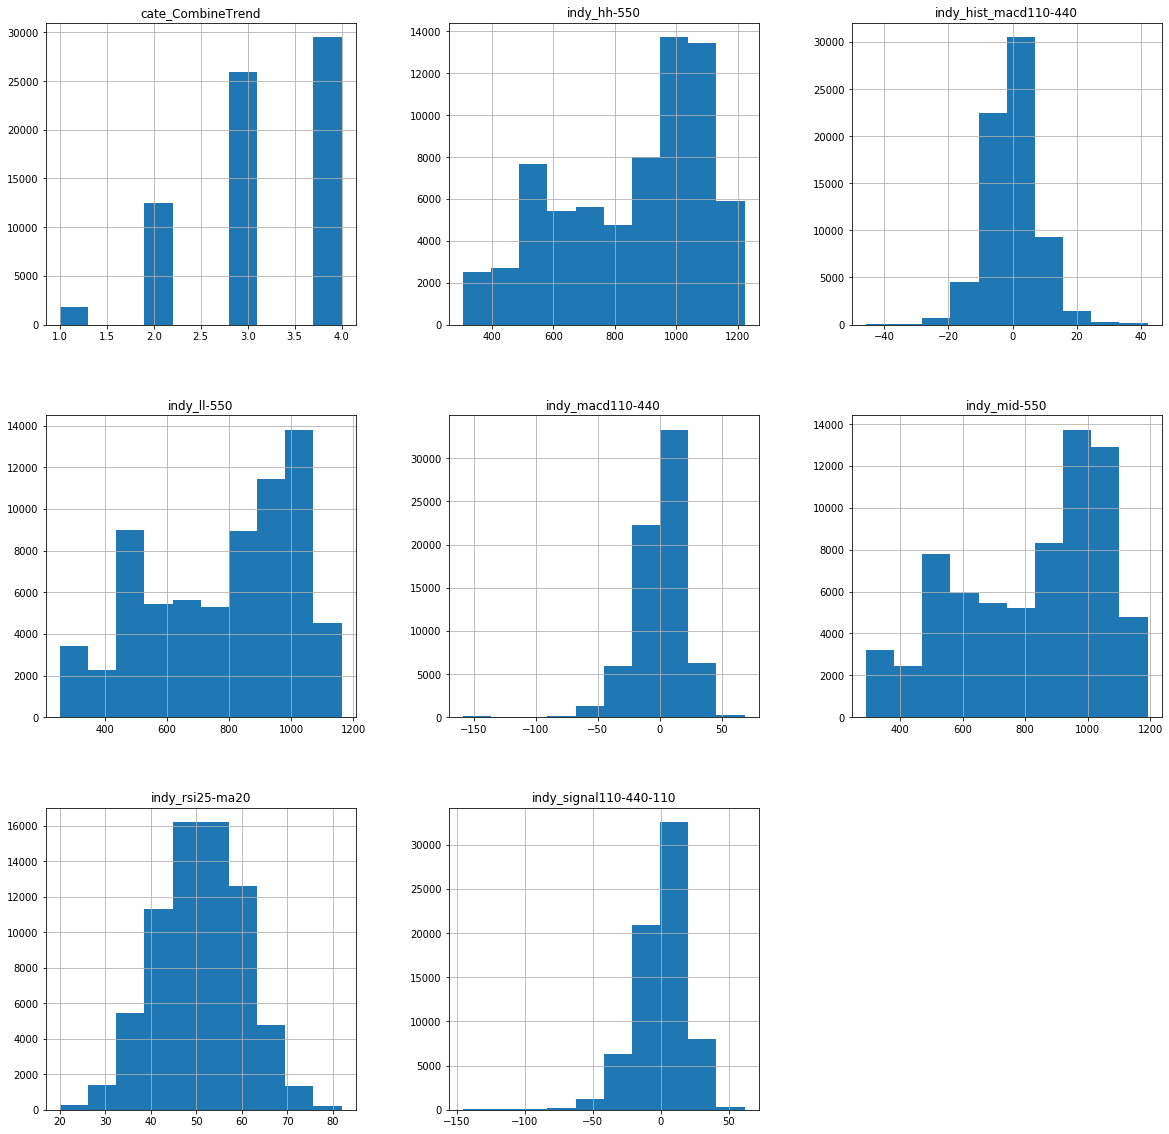

In [26]:
dfx.hist(figsize=(20,20))

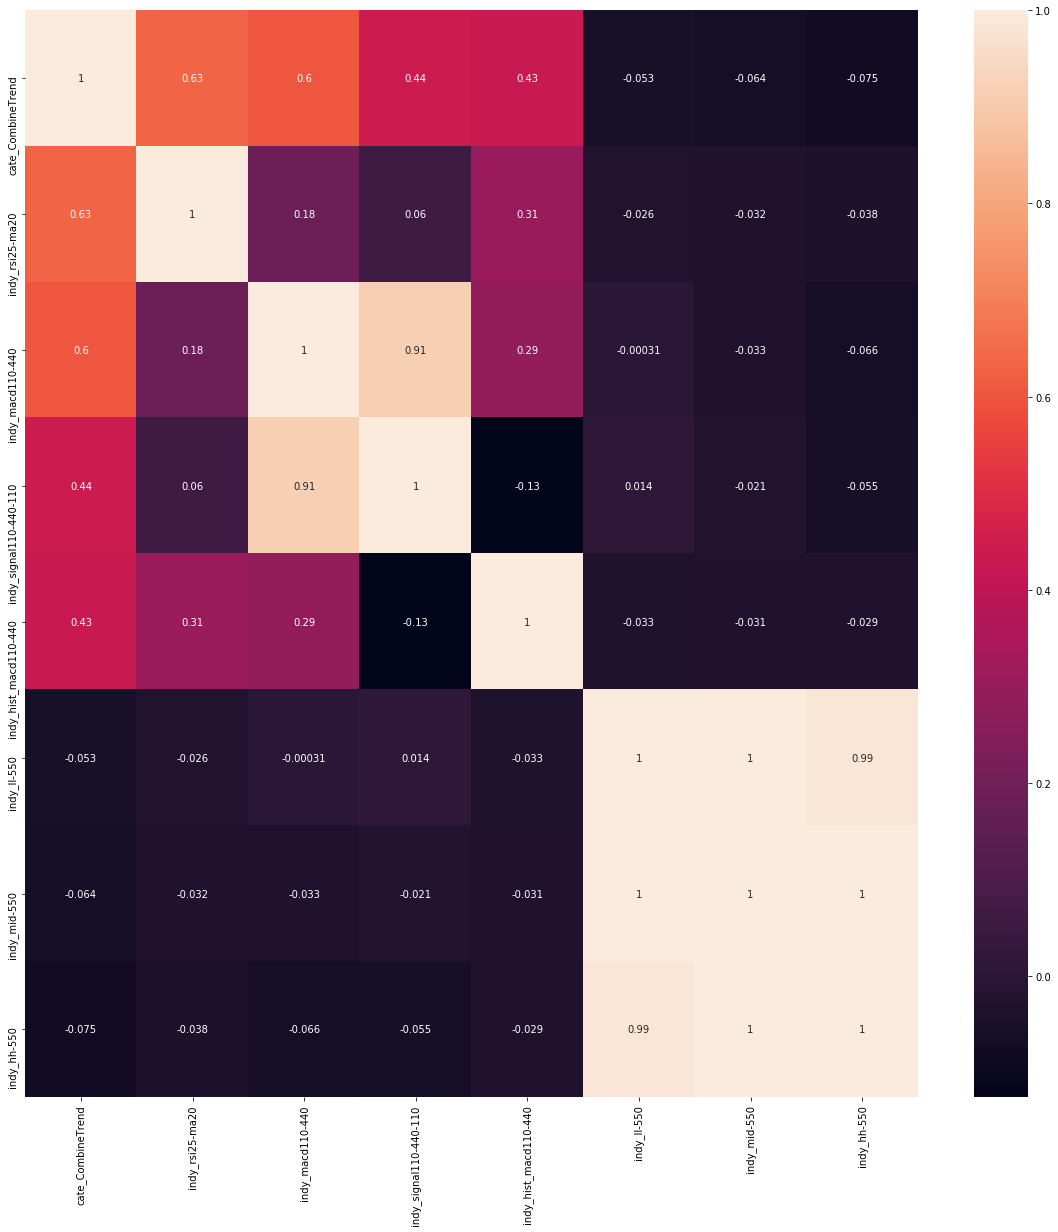

In [27]:
corrFeature=dfx.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrFeature,annot=True,)

In [28]:
dfx_best=dfx[['cate_CombineTrend','indy_macd110-440','indy_rsi25-ma20']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D581A1348>,
      dtype=object)

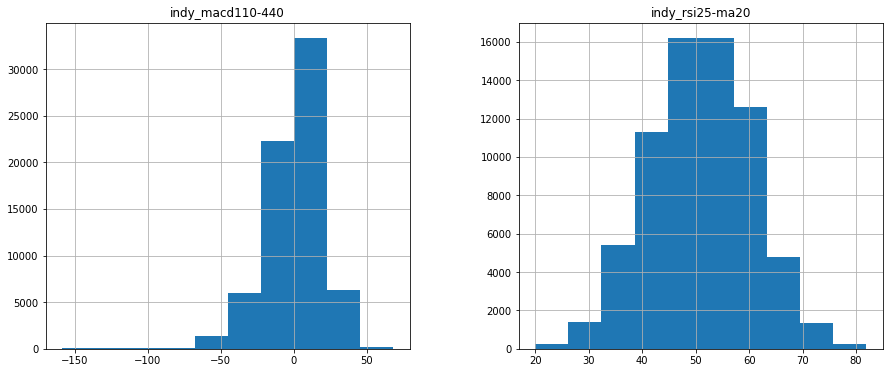

In [29]:
dfx_best[['indy_macd110-440','indy_rsi25-ma20']].hist(figsize=(15,6))

In [30]:
count_CombineTrend=dfx_best['cate_CombineTrend'].value_counts()
count_CombineTrend

4    29518
3    25898
2    12454
1     1809
Name: cate_CombineTrend, dtype: int64

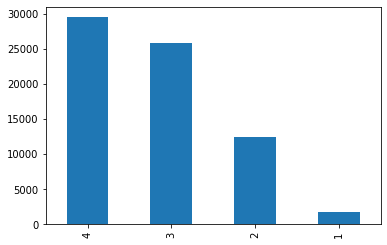

In [31]:
count_CombineTrend.plot(kind='bar')

In [32]:
dfx_best=dfx[['indy_macd110-440','indy_rsi25-ma20']]